Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def Lorenz(_,y,params):
    s,r,b=params
    dY = np.zeros(3)
    dY[0] = s* ( y[1] - y[0] )
    dY[1] = r * y[0] - y[1] - y[0] * y[2]
    dY[2] = y[0] * y[1] - b * y[2]
    return dY

def stabilized_Lorenz(t,y,params):
    s,r,b,K,y_upo,dt=params
    if(t<10):
        K = 0

    dY = np.zeros(3)
    dY[0] = s* ( y[1] - y[0] )
    dY[1] = r * y[0] - y[1] - y[0] * y[2] + K*(y_upo[int(t/dt)%len(y_upo)]-y[1])
    dY[2] = y[0] * y[1] - b * y[2]
    return dY

def rungeKutta(f,x,all_t,params): 
    # step height h
    h = all_t[1]-all_t[0]
    all_x = np.zeros((len(all_t),len(x)))
    all_F = np.zeros(len(all_t))
    _,_,_,K,y_upo,dt=params
    for ind_t,t in enumerate(all_t):
    #runge kutta formulas
        k1 = h * f(t,x,params) 
        k2 = h * f(t+h/2,x + 0.5 * k1,params) 
        k3 = h * f(t+h/2,x + 0.5 * k2,params) 
        k4 = h * f(t+h,x + k3,params) 
        # Update next value of x
        all_F[ind_t] =K*(y_upo[int(t/dt)%len(y_upo)]-x[1])*(t>=10)
        x = x + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        all_x[ind_t,:] =x
        
        
    return all_x,all_F



Load UPO

In [2]:
import csv
"""
with open('', 'r') as f:
    reader = csv.reader(f, dialect='excel', delimiter='\t')
    for row in reader:
        print(row)
"""
fileName = "Lorenz_Database/Lorenz_CompleteOrbits/LLR_orbit.txt"
time_upo = []
r_upo = []
with open(fileName) as my_file:
    for ind_l,line in enumerate(my_file):
        if(ind_l>=24 and line!='\n'):
                #print(line==False)
            t_i,x_i,y_i,z_i = [float(i) for i in line.split()]
            time_upo.append(t_i)
            r_upo.append([x_i,y_i,z_i])
time_upo = np.array(time_upo)
r_upo = np.array(r_upo)

Runge Kutta

In [339]:
dt = 0.02
s,r,b = 10.0,28.0,8.0/3.0
K = 20.0
y_upo = r_upo[:,1]
params=s,r,b,K,y_upo,dt

all_t = np.arange(0,100,dt)

all_x,all_F = rungeKutta(stabilized_Lorenz,[0.0,1.0,27.0],all_t,params)

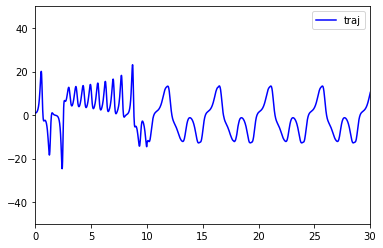

In [340]:
plt.figure()
plt.plot(all_t,all_x[:,1],label="traj",c="b")

#plt.plot(time_upo,r_upo[:,1],label="UPO",c="g")
#plt.plot(time_upo+time_upo[-1],r_upo[:,1],c="g")
plt.xlim([all_t[0],30])
plt.ylim([-50,50])
plt.legend()

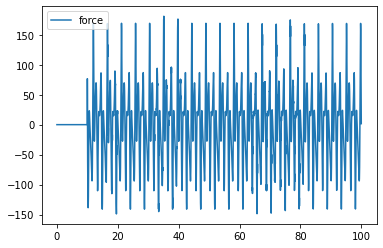

In [341]:
plt.figure()
plt.plot(all_t,all_F,label="force")
#plt.ylim([-100,300])
plt.legend()
plt.show()

In [308]:
#x0 = np.array([1.0,1.0,1.0])
s,r,b = 10.0,28.0,8.0/3.0
params = s,r,b
dt = 0.02
all_t = np.arange(0,10,dt)

all_x = rungeKutta(Lorenz,r_upo[0,:],all_t,params)

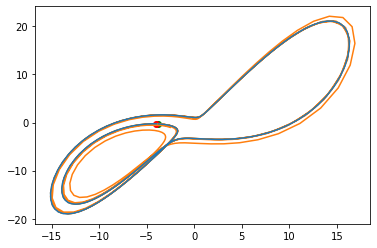

In [309]:
plt.figure()
plt.plot(r_upo[:,0],r_upo[:,1],zorder=50)
plt.plot(all_x[:,0],all_x[:,1])
plt.scatter(r_upo[0,0],r_upo[0,1],c="g")
plt.scatter(r_upo[-1,0],r_upo[-1,1],c="r")
plt.show()

Euler

In [3]:
def stabilized_Lorenz(t,y,params):
    s,r,b,K,y_upo,dt=params
    dY = np.zeros(3)
    dY[0] = s* ( y[1] - y[0] )
    dY[1] = r * y[0] - y[1] - y[0] * y[2] + K*(y_upo[int(t/dt)%len(y_upo)]-y[1])
    dY[2] = y[0] * y[1] - b * y[2]
    return dY

def Euler(x,all_t,params): 
    # step height h
    s,r,b,K,y_upo,h=params
    all_x = np.zeros((len(all_t),len(x)))
    all_F = np.zeros(len(all_t))
    all_vel = np.zeros(len(all_t))
    for ind_t,t in enumerate(all_t):
        
        dY = np.zeros(3)
        dY[0] = s* ( x[1] - x[0] )
        F = K*(y_upo[ind_t%len(y_upo)]-x[1])
        if(t<10):
            F = 0.0
        dY[1] = r * x[0] - x[1] - x[0] * x[2] + F
        dY[2] = x[0] * x[1] - b * x[2]
        
        x = x + h * dY
        all_x[ind_t,:] =x
        all_F[ind_t] = F
        all_vel[ind_t]=r * x[0] - x[1] - x[0] * x[2]
    return all_x,all_F,all_vel

In [4]:
dt = 0.01
s,r,b = 10.0,28.0,8.0/3.0
K = 20.0
y_upo = r_upo[:,1]
params=s,r,b,K,y_upo,dt

all_t = np.arange(0,100,dt)

all_x,all_F,all_vel = Euler([0.0,1.0,27.0],all_t,params)

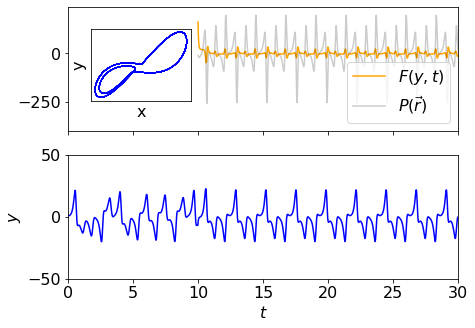

In [6]:
import matplotlib   
matplotlib.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(2,sharex=True,figsize=(7,5))

ax[0].plot(all_t[1000:],all_F[1000:],c="orange",label=r"$F(y,t)$")
ax[0].plot(all_t[1000:],all_vel[1000:],alpha=0.2,c="k",label=r"$P(\vec{r})$")
ax[0].set_ylim([-400,240])
ax[0].legend(loc=4)
left, bottom, width, height = [0.17, 0.62, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(all_x[len(all_t)//2:,0],all_x[len(all_t)//2:,1],c="b",linewidth=1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_xlabel("x")
ax2.set_ylabel("y")
#plt.plot(time_upo,r_upo[:,1],label="UPO",c="g")
#plt.plot(time_upo+time_upo[-1],r_upo[:,1],c="g")

ax[1].plot(all_t,all_x[:,1],c="b")
ax[1].set_xlim([all_t[0],30])
ax[1].set_ylim([-50,50])
ax[1].set_xlabel(r"$t$")
ax[1].set_ylabel(r"$y$")
#ax[1].legend()
plt.savefig("Lorenz.pdf",bbox_inches="tight")

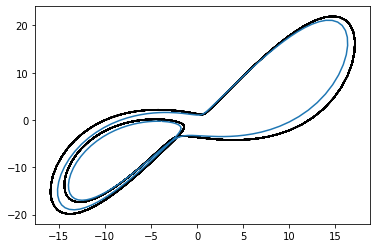

In [307]:
plt.figure()
plt.plot(r_upo[:,0],r_upo[:,1],zorder=50)
#plt.plot(all_x[:,0],all_x[:,1],c="r")
plt.plot(all_x[len(all_t)//2:,0],all_x[len(all_t)//2:,1],c="k")

plt.show()